In [1]:
#importando biblitecas nescessarias
import matplotlib.pyplot as plt
import numpy as np

## Convolução de Dois Sinais

A convolução entre dois sinais $x_1(t)$ e $x_2(t)$ é definida como:

$\displaystyle y(t) = \int_{-\infty}^{\infty}{x_1(\tau)x_2(t - \tau) \, d(\tau)}$



### Passos para o Cálculo:
1. **Inverter** o sinal $x_2(\tau)$ para obter $x_2(-\tau)$;
2. **Deslocar** $x_2(-\tau)$ por $t$, resultando em $x_2(t-\tau)$;
3. **Multiplicar** os dois sinais $x_1(\tau)$ e $x_2(t-\tau)$ em cada ponto $t$ confrome o resultado $y(t)$;
4. **Integrar** o produto ao longo de todo o domínio $(-\infty,\infty)$ para obter um contínuo de t, o sinal de sáida em função de t.


#### Observação: 
 Não conseguimos integrar de $(-\infty,\infty)$, então por efeito de simplicidade colocaos $(-10,10)$, mas isso pode ser alterado na função

In [2]:
# Funções de exemplo
def x1(t):
    return np.where((t >= 0), 1, 0)  # Retângulo de altura 1 entre 0 e 1

def x2(t):
    return np.where(t <=0, np.exp(t), 0)  # Retângulo de altura 1 entre -1 e 1

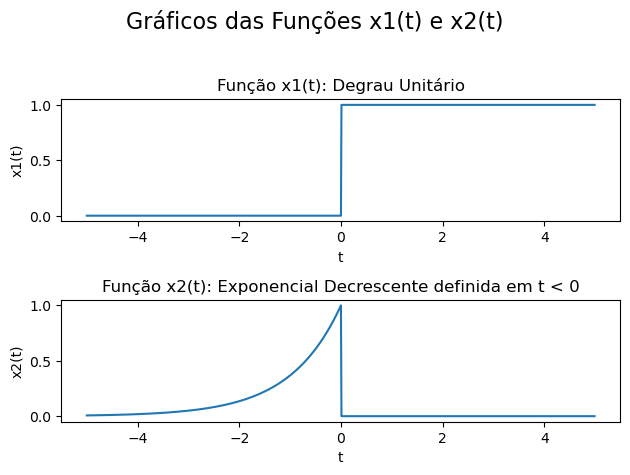

In [3]:
t = np.arange(-5, 5, 0.01)
figure, axis = plt.subplots(2, 1)
# ploatar x1(t)
axis[0].plot(t, x1(t))
axis[0].set_title("Função x1(t): Degrau Unitário", fontsize=12)
axis[0].set_xlabel("t", fontsize=10)
axis[0].set_ylabel("x1(t)", fontsize=10)
# ploatar x2(t)
axis[1].plot(t, x2(t))
axis[1].set_title("Função x2(t): Exponencial Decrescente definida em t < 0", fontsize=12)
axis[1].set_xlabel("t", fontsize=10)
axis[1].set_ylabel("x2(t)", fontsize=10)

figure.suptitle("Gráficos das Funções x1(t) e x2(t)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reservar espaço para o título geral
plt.show()

In [27]:
def convolucao(x1, x2, a, b, limite_integral, dt=0.01):
    # Gerando o vetor t com o número correto de pontos
    t = np.arange(a, b, dt)
    tau = np.arange(-limite_integral, limite_integral, dt)
    
    # Pré-calcular os valores de x1(τ) para o suporte
    x1_tau = x1(tau)

    # Lista para armazenar o resultado da convolução
    f = np.zeros_like(t)

    # Loop sobre cada valor de t
    for i, t_valor in enumerate(t):
        # Garantir que o domínio de t - τ esteja correto
        shifted_tau = t_valor - tau
        
        # Calcular x2(t - τ) considerando o suporte limitado
        x2_shifted = x2(shifted_tau)
        
        # Calcular a soma que aproxima a integral
        f[i] = np.sum(x1_tau * x2_shifted * dt)

    return f


len(x1): 1000
len(x2): 1000
len(convolucao): 1000
len(t): 1000


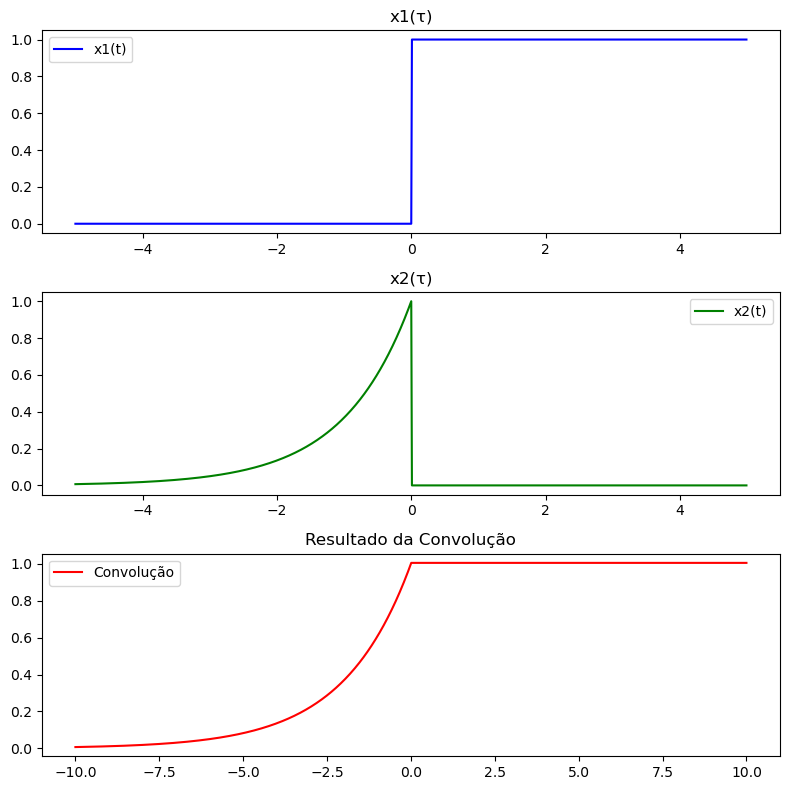

In [31]:
def plotar_graficos(x1, x2, f, a, b):
    dt = 0.01
    t = np.arange(a, b, dt)
    t_conv = np.linspace(2 * a, 2 * b, len(f))

    fig, ax = plt.subplots(3, 1, figsize=(8, 8))
    print("len(x1):", len(x1(t)))
    print("len(x2):", len(x2(t)))
    print("len(convolucao):", len(f))
    print("len(t):", len(t))

    # Gráficos iniciais
    ax[0].plot(t, x1(t), label="x1(t)", color="blue")
    ax[0].set_title("x1(τ)")
    ax[0].legend()

    ax[1].plot(t, x2(t), label="x2(t)", color="green")
    ax[1].set_title("x2(τ)")
    ax[1].legend()

    ax[2].plot(t_conv, f, label="Convolução", color="red")
    ax[2].set_title("Resultado da Convolução")
    ax[2].legend()

    plt.tight_layout()
    plt.show()

# Parâmetros
a, b = -5, 5

# Calcular convolução
f = convolucao(x1, x2, a, b, limite_integral=100)

# Plotar os gráficos
plotar_graficos(x1, x2, f, a, b)

1999
1999


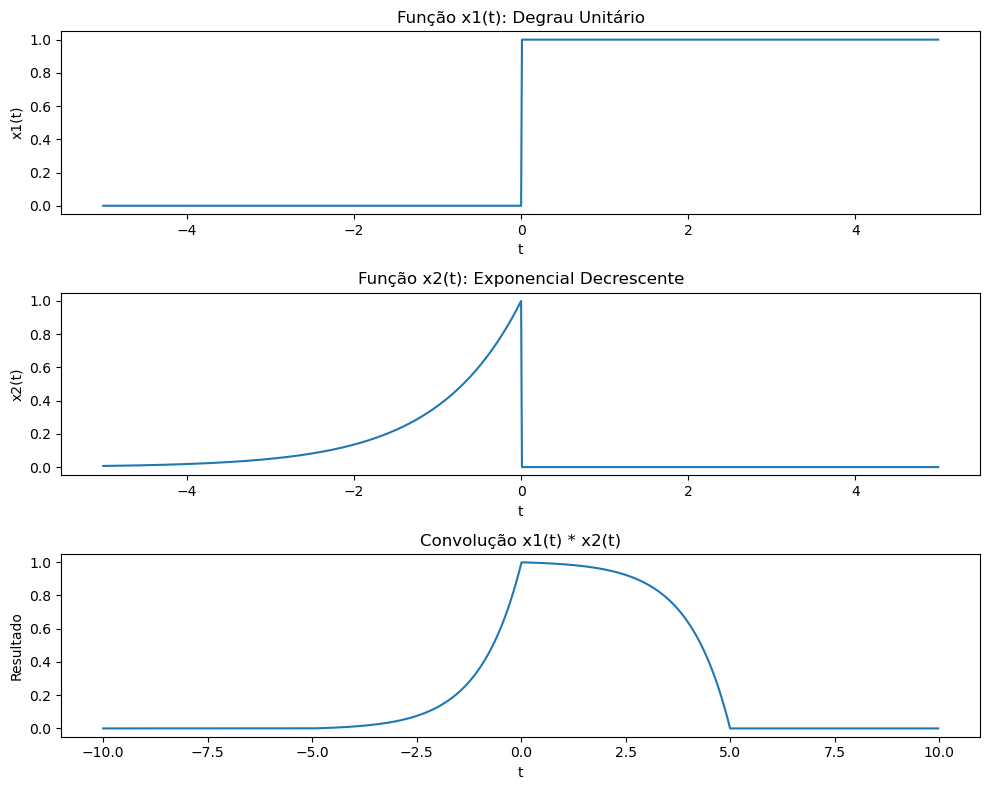

In [14]:
t = np.arange(-5, 5, 0.01)
dt = t[1] - t[0]  # Passo do tempo

# Valores de x1 e x2 no domínio discreto
x1_values = x1(t)
x2_values = x2(t)

# Convolução
conv_result = np.convolve(x1_values, x2_values, mode='full') * dt  # Multiplicação pelo passo do tempo
conv_time = np.linspace(2 * t[0], 2 * t[-1], len(conv_result))


# Plotagem
figure, axis = plt.subplots(3, 1, figsize=(10, 8))

# Sinal x1(t)
axis[0].plot(t, x1_values)
axis[0].set_title("Função x1(t): Degrau Unitário")
axis[0].set_xlabel("t")
axis[0].set_ylabel("x1(t)")

# Sinal x2(t)
axis[1].plot(t, x2_values)
axis[1].set_title("Função x2(t): Exponencial Decrescente")
axis[1].set_xlabel("t")
axis[1].set_ylabel("x2(t)")

# Convolução x1(t) * x2(t)
axis[2].plot(conv_time, conv_result)
axis[2].set_title("Convolução x1(t) * x2(t)")
axis[2].set_xlabel("t")
axis[2].set_ylabel("Resultado")

# Ajustar layout
plt.tight_layout()
plt.show()
